In [18]:
"""
This code is designed to plot the black hole mass vs stellar mass of galaxies in different simulations,
as drawn from the catalogue of Melanie Habouzit
@author: clara
"""
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import os


In [34]:
#unused for the moment

folder_list = ['../../Simulation Data/EAGLE','../Simulation Data/HAGN','../Simulation Data/Illustris','../Simulation Data/TNG-100','../Simulation Data/TNG-300','../Simulation Data/SIMBA']

def read_folder(csv_folder): 
   files = os.listdir(csv_folder)
   df = []
   for f in files:
     print(f)
     csv_file = csv_folder + "/" + f
     df.append(pd.read_csv(csv_file))
   df_full = pd.concat(df, ignore_index=True)
   return df_full

EAGLE
[48146060.   30809586.   73755376.   ...  1141612.8    539826.9
   372852.66] [4.00042150e+10 4.21227720e+10 3.60579600e+10 ... 1.12651994e+09
 1.56528410e+09 2.06847872e+09]
HAGN
[9.27176132e+09 1.17228050e+09 1.15667419e+09 ... 1.75877884e+06
 2.08678748e+05 4.47476767e+06] [1.537e+12 3.687e+11 3.964e+11 ... 9.586e+08 1.258e+09 1.451e+09]
Illustris
[1.28833175e+09 1.40835330e+09 1.13286067e+09 ... 1.44346899e+05
 1.44184805e+05 2.96128245e+05] [4.38301970e+11 2.84316784e+11 3.74201861e+11 ... 6.16629153e+08
 5.13364053e+08 5.40218157e+08]
TNG100
[1.85293770e+09 2.62012105e+09 5.08089755e+08 ... 1.18098612e+06
 1.18098760e+06 1.18098612e+06] [3.79849424e+11 4.25932979e+11 1.20446413e+11 ... 5.82142014e+06
 3.46167700e+06 3.67299970e+06]
TNG300
[1.89337172e+10 4.04904045e+09 1.79889283e+09 ... 1.18146885e+06
 1.18117213e+06 1.18098760e+06] [2.56163271e+12 5.64524653e+11 2.46786242e+11 ... 2.71814290e+07
 3.01904340e+07 2.67705934e+07]
SIMBA
[1.70298655e+10 1.92742420e+10 1.641690

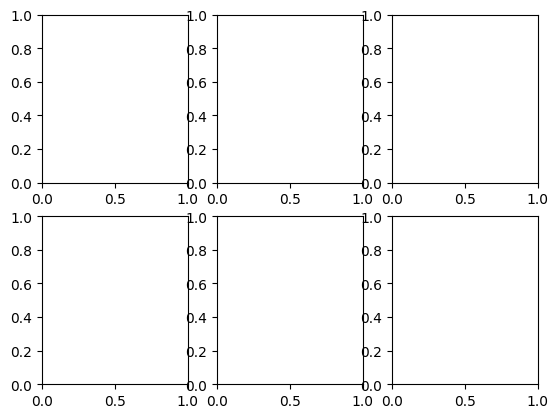

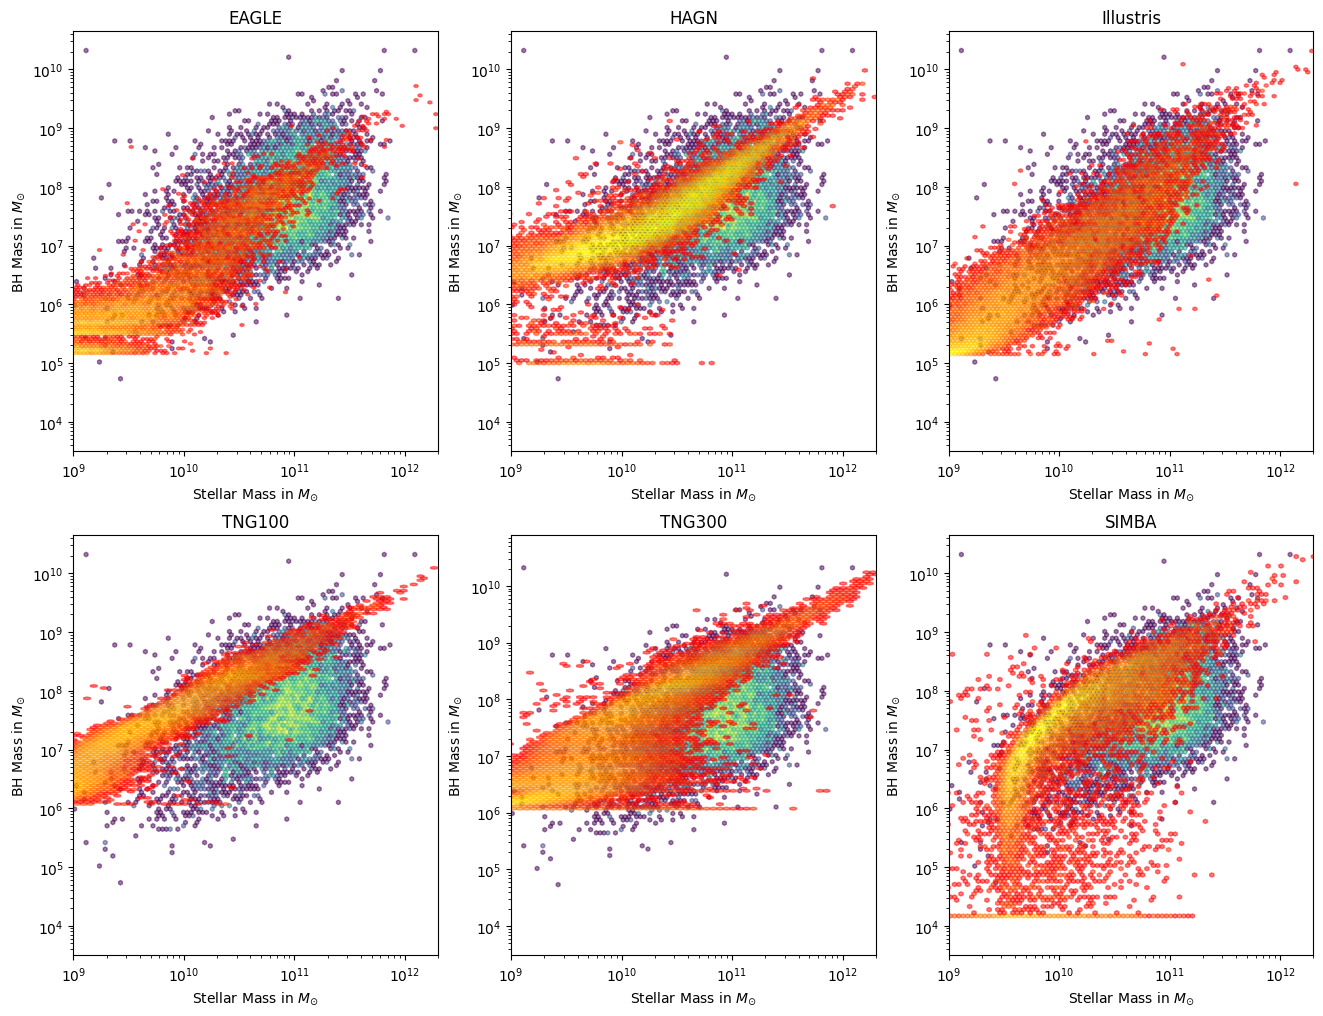

In [35]:
#observations
df_data = pd.read_csv("../../Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
data_stellar_mass = 10**df_data['stellar mass'].to_numpy()
data_massBH = 10**df_data['massBH'].to_numpy()
    

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    massBH = df['massBH'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    print(sim_list[x])
    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    print(massBH,stellar_mass)
    axes[i][j].hexbin(data_stellar_mass, data_massBH,bins='log', xscale='log', yscale='log', alpha = 0.5)
    axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    
    axes[i][j].set_xlabel(r'Stellar Mass in $M_{\odot}$')
    axes[i][j].set_xlim([10**9, 2*10**12])
    axes[i][j].set_ylabel(r'BH Mass in $M_{\odot}$')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/stellarMass_vs_BHMass_withdata')
plt.show()

In [14]:
df_data = pd.read_csv("../../Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
df_data['stellar mass'] = 10**(df_data['stellar mass'])
df_data['massBH'] = 10**(df_data['massBH'])
bins = np.logspace(9,12,40)
group_data = df_data.groupby(pd.cut(df_data['stellar mass'], bins))
plot_centers_data = (bins [:-1] + bins [1:])/2
plot_values_data = group_data['massBH'].median()
lower_q_data = group_data['massBH'].quantile(q=0.25)
upper_q_data = group_data['massBH'].quantile(q=0.75)


sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([[28,761,135,99,99,151],[19,343,85,50,50,105],[15,197,68,33,33,78],[12,125,60,25,25,62],[10,97,54,21,21,50],[8,70,49,17,17,42]])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])

y = 0
cols = len(sim_list)
rows = len(snapshot_num)
fig, axes = plt.subplots(rows, cols,figsize=(32, 28))
bins = np.array([np.logspace(9,12,40),np.logspace(9,12,30),np.logspace(9,12,20),np.logspace(9,12,20),np.logspace(9,12,20),np.logspace(9,12,10)])
colors = plt.cm.jet(np.linspace(0,1,len(sim_list)+1))
while y < rows:
    x = 0
    while x < cols:
        filename = ("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[y][x])+"_epsr01_correctlum_units.txt")
        
        df = pd.read_csv(filename,header=0,sep="\s+| |  ",
                        names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
        group = df.groupby(pd.cut(df['stellar mass'], bins[y]))
        
        plot_centers = (bins[y] [:-1] + bins[y] [1:])/2
        plot_values = group['massBH'].median()


        axes[y][x].plot(plot_centers, plot_values, label=str(sim_list[x]), color= colors[x])
        lower_q = group['massBH'].quantile(q=0.25)
        upper_q = group['massBH'].quantile(q=0.75)
        axes[y][x].fill_between(plot_centers, lower_q, upper_q ,alpha=0.3, color= colors[x])
        axes[y][x].plot(plot_centers_data, plot_values_data, label='Observational Data', color='black')
        axes[y][x].fill_between(plot_centers_data, lower_q_data, upper_q_data ,alpha=0.3,color='black')

        axes[y][x].set_xlabel(r'Stellar Mass in $M_{\odot}$')
        axes[y][x].set_xlim([10**9, 10**12])
        axes[y][x].set_ylabel(r'BH Mass in $M_{\odot}$')
        axes[y][x].set_xscale('log')
        axes[y][x].set_yscale('log')
        x +=1
    y +=1

fig.tight_layout()
for ax, col in zip(axes[0], sim_list):
    ax.set_title(col, fontsize=40)

for ax, row in zip(axes[:,0], ['z = 0','z = 1','z = 2','z = 3','z = 4','z = 5']):
    ax.set_ylabel(row, fontsize=40)

plt.savefig('Figures/stellarMass_vs_BHMass_meanRelation_redshiftVariation_v2')
plt.show()

c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
C:\Users\clara\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
x = 0
bins = np.logspace(9,12,40)
colors = plt.cm.jet(np.linspace(0,1,len(sim_list)+1))
while x < len(snapshot_num):
    filename = ("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename,header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    group = df.groupby(pd.cut(df['stellar mass'], bins))
    plot_centers = (bins [:-1] + bins [1:])/2
    plot_values = group['massBH'].median()
    plt.plot(plot_centers, plot_values, label=str(sim_list[x]), color= colors[x])
    #sdt = group['massBH'].std()
    #plt.fill_between(plot_centers, plot_values-sdt, plot_values+sdt ,alpha=0.3)
    lower_q = group['massBH'].quantile(q=0.25)
    upper_q = group['massBH'].quantile(q=0.75)
    plt.fill_between(plot_centers, lower_q, upper_q ,alpha=0.3, color= colors[x])
    x +=1


df_data = pd.read_csv("../../Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
df_data['stellar mass'] = 10**(df_data['stellar mass'])
df_data['massBH'] = 10**(df_data['massBH'])
group_data = df_data.groupby(pd.cut(df_data['stellar mass'], bins))
plot_centers_data = (bins [:-1] + bins [1:])/2
plot_values_data = group_data['massBH'].median()
plt.plot(plot_centers_data, plot_values_data, label='Observational Data', color= colors[x])
lower_q = group_data['massBH'].quantile(q=0.25)
upper_q = group_data['massBH'].quantile(q=0.75)
plt.fill_between(plot_centers, lower_q, upper_q ,alpha=0.3,color= colors[x])
plt.xlabel(r'Stellar Mass in $M_{\odot}$')
plt.xlim([10**9, 10**12])
plt.ylabel(r'BH Mass in $M_{\odot}$')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=8)


plt.savefig('Figures/stellarMass_vs_BHMass_meanRelation')
plt.show()

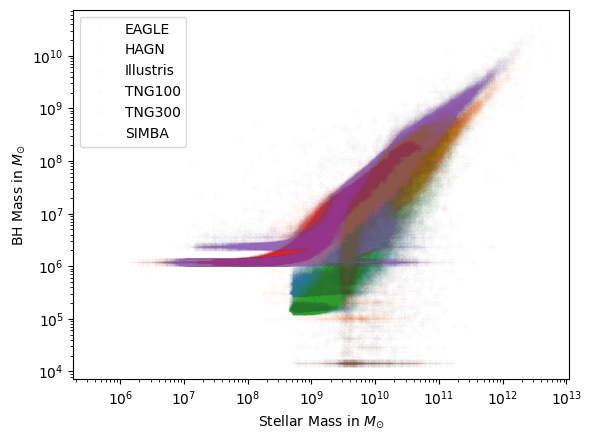

In [37]:

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
filename = []
x = 0
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    massBH = df['massBH'].to_numpy()
    plt.loglog(stellar_mass, massBH, "+", label=str(sim_list[x]),alpha=0.02)
    x += 1
    
plt.xlabel(r'Stellar Mass in $M_{\odot}$')
plt.ylabel(r'BH Mass in $M_{\odot}$')
plt.legend()
plt.savefig('Figures/stellarMass_vs_BHMass_oneplot')
plt.show()


[48146060.   30809586.   73755376.   ...  1141612.8    539826.9
   372852.66] [1.6492034e-08 5.2915480e-09 9.5454084e-08 ... 5.1939804e-07 5.4363480e-06
 2.7460969e-08]
[9.27176132e+09 1.17228050e+09 1.15667419e+09 ... 1.75877884e+06
 2.08678748e+05 4.47476767e+06] [2.44180895e-01 2.17104120e-03 8.49498636e-04 ... 7.21987584e-08
 2.03751433e-08 2.23744668e-03]
[1.28833175e+09 1.40835330e+09 1.13286067e+09 ... 1.44346899e+05
 1.44184805e+05 2.96128245e+05] [1.28858836e-05 4.25777692e-03 1.01256476e-01 ... 1.06147233e-06
 4.06880173e-07 7.23536992e-07]
[1.85293770e+09 2.62012105e+09 5.08089755e+08 ... 1.18098612e+06
 1.18098760e+06 1.18098612e+06] [2.35192860e-03 1.07717778e-02 5.24122480e-04 ... 1.17699652e-11
 4.62920010e-11 1.51236582e-12]
[1.89337172e+10 4.04904045e+09 1.79889283e+09 ... 1.18146885e+06
 1.18117213e+06 1.18098760e+06] [4.89112848e-03 7.01522262e-06 3.45407384e-07 ... 2.40762760e-12
 2.01462772e-15 1.09372396e-10]
[1.70298655e+10 1.92742420e+10 1.64169001e+10 ... 2.511

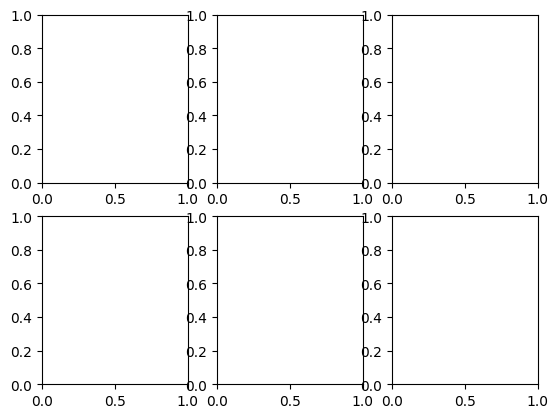

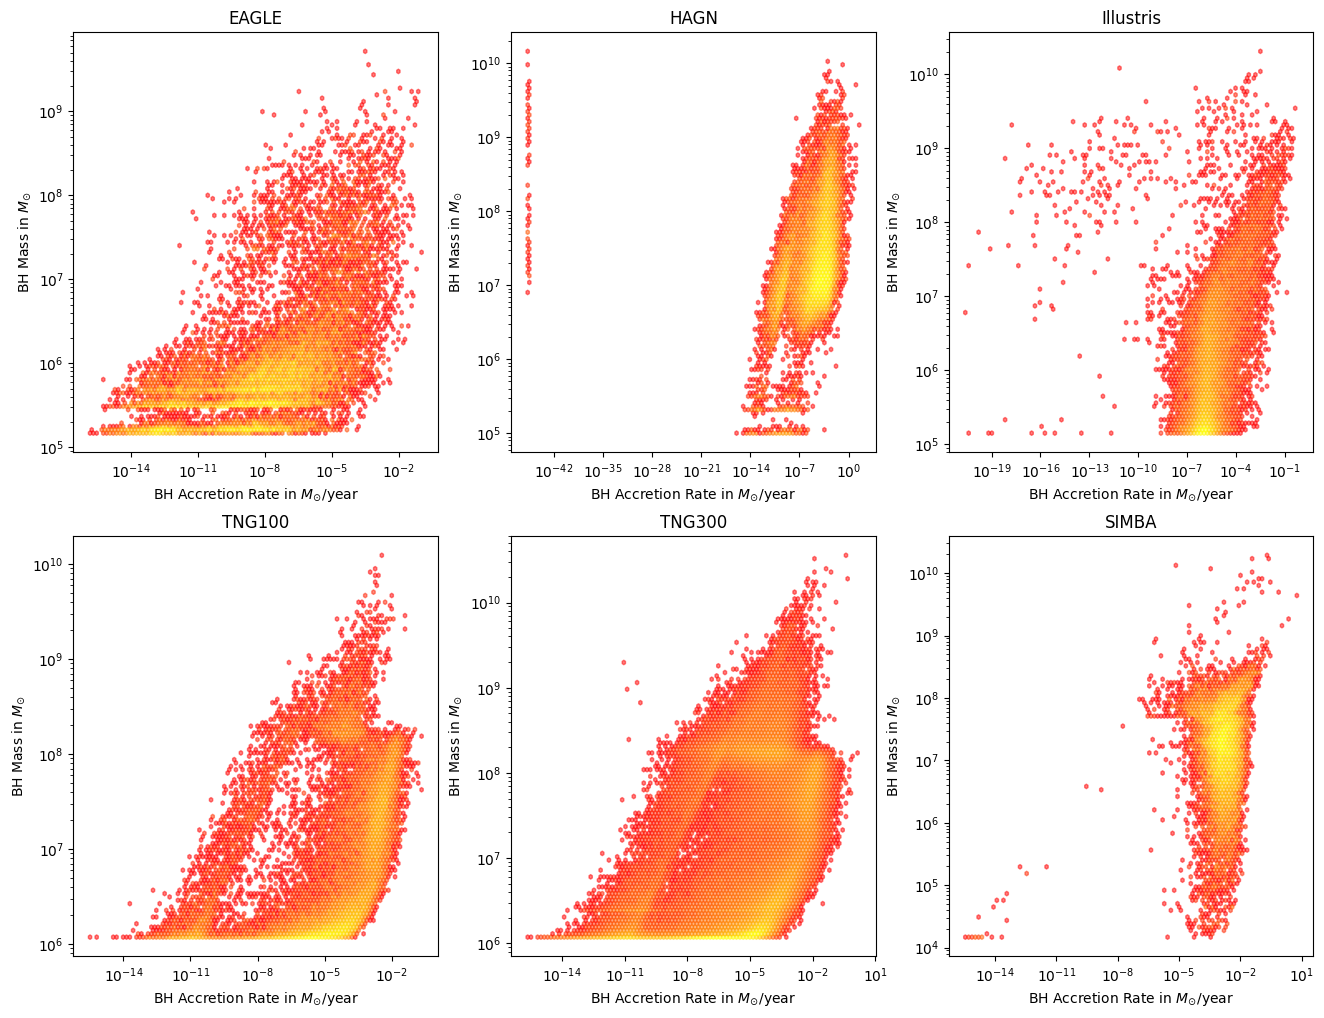

In [72]:
#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['BHdot'].to_numpy()
    massBH = df['massBH'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    zero_rows = (stellar_mass <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])


    print(massBH,stellar_mass)
    axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    
    axes[i][j].set_xlabel(r'BH Accretion Rate in $M_{\odot}$/year')
    #axes[i][j].set_xlim([10**9, 2*10**12])
    axes[i][j].set_ylabel(r'BH Mass in $M_{\odot}$')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/bhDot_vs_BHMass_withdata')
plt.show()

[48146060.   30809586.   73755376.   ...  1141612.8    539826.9
   372852.66] [3.7528293 1.7459352 1.4813268 ... 4.9593043 3.9385185 3.6280563]
[] []
[1.28833175e+09 1.40835330e+09 1.13286067e+09 ... 1.44346899e+05
 1.44184805e+05 2.96128245e+05] [412.51017831 116.72596498  55.14383858 ...  17.12659543  17.01357283
  11.74144176]
[1.85293770e+09 2.62012105e+09 5.08089755e+08 ... 1.18098612e+06
 1.18098760e+06 1.18098612e+06] [444.2855034  115.51431946 160.86654857 ...   9.40140242   9.073354
   9.42193682]
[1.89337172e+10 4.04904045e+09 1.79889283e+09 ... 1.18146885e+06
 1.18117213e+06 1.18098760e+06] [703.36876292 108.99852377 111.33540006 ...   9.99638323   8.70763212
   6.0295837 ]
[1.70298655e+10 1.92742420e+10 1.64169001e+10 ... 2.51162672e+08
 1.60220625e+04 5.17389781e+05] [11.19317818 14.11977482 15.34783649 ...  1.5148257   5.82417536
  1.76425898]


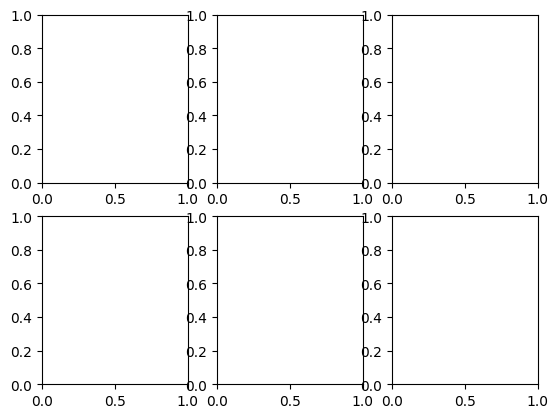

In [3]:

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['radius'].to_numpy()
    massBH = df['massBH'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    zero_rows = (stellar_mass <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])


    print(massBH,stellar_mass)
    axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    
    axes[i][j].set_xlabel(r'Galaxy radius in kpc??')
    axes[i][j].set_xlim([10**0, 2*10**3])
    axes[i][j].set_ylabel(r'BH Mass in $M_{\odot}$')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/radius_vs_BHMass')
plt.show()

c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


[73755376.   64829620.   54303524.   ...  1141612.8    539826.9
   372852.66] [5.40713554e+38 1.04093606e+38 1.21875048e+38 ... 2.94220581e+39
 3.07949846e+40 1.55556656e+38]
[9.27176132e+09 1.17228050e+09 1.15667419e+09 ... 1.75877884e+06
 2.08678748e+05 4.47476767e+06] [1.38319823e+45 1.22981789e+43 4.81210869e+42 ... 4.08980377e+38
 1.15417965e+38 1.26743424e+43]
[1.28833175e+09 1.40835330e+09 1.13286067e+09 ... 1.44346899e+05
 1.44184805e+05 2.96128245e+05] [7.29939637e+40 2.41187972e+43 5.73582050e+44 ... 6.01286451e+39
 2.30483197e+39 4.09858061e+39]
[1.85293770e+09 2.62012105e+09 5.08089755e+08 ... 1.18148066e+06
 1.20121642e+06 1.21393268e+06] [1.33228419e+43 6.10183034e+43 2.96896808e+42 ... 2.70020133e+39
 3.26756115e+38 3.58677558e+39]
[1.89337172e+10 4.04904045e+09 1.79889283e+09 ... 1.18369501e+06
 1.18166224e+06 1.18297018e+06] [2.77065093e+43 3.97387497e+40 1.95661041e+39 ... 2.71645759e+38
 3.31698992e+38 2.80067407e+38]
[1.70298655e+10 1.92742420e+10 1.64169001e+10 ...

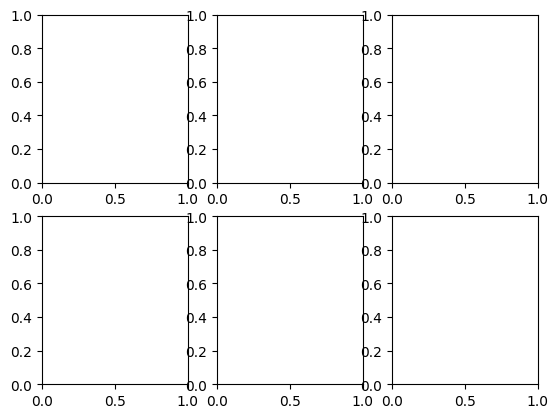

In [7]:

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    df['bolLum'] = 10**(df['bolLum'])
    stellar_mass = df['bolLum'].to_numpy()
    massBH = df['massBH'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    zero_rows = (stellar_mass <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])


    zero_rows = (stellar_mass <= 10**38)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])

    print(massBH,stellar_mass)
    axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    
    axes[i][j].set_xlabel(r'Bolometric Luminosity in erg/s')
    #axes[i][j].set_xlim(left=10**38)
    axes[i][j].set_ylabel(r'BH Mass in $M_{\odot}$')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/bolLum_vs_BHMass')
plt.show()

[48146060.   30809586.   73755376.   ...  1141612.8    539826.9
   372852.66] [1.44633233e+31 2.32680518e+30 3.16282929e+32 ... 6.05009492e+35
 1.40165258e+38 5.17815296e+33]
[9.27176132e+09 1.17228050e+09 1.15667419e+09 ... 1.75877884e+06
 2.08678748e+05 4.47476767e+06] [1.64642338e+43 1.02940196e+40 1.59733030e+39 ... 7.58802287e+33
 5.09335006e+33 2.86427890e+42]
[1.28833175e+09 1.40835330e+09 1.13286067e+09 ... 1.44346899e+05
 1.44184805e+05 2.96128245e+05] [3.29975052e+35 3.29560078e+40 2.31712533e+43 ... 1.99843625e+37
 2.93963877e+36 4.52607818e+36]
[1.85293770e+09 2.62012105e+09 5.08089755e+08 ... 1.18098612e+06
 1.18098760e+06 1.18098612e+06] [7.64307028e+39 1.13379313e+41 1.38422134e+39 ... 3.00321184e+26
 4.64565522e+27 4.95848858e+24]
[1.89337172e+10 4.04904045e+09 1.79889283e+09 ... 1.18146885e+06
 1.18117213e+06 1.18098760e+06] [3.23491342e+39 3.11179662e+34 1.69800260e+32 ... 1.25613627e+25
 8.79745035e+18 2.59328662e+28]
[1.70298655e+10 1.92742420e+10 1.64169001e+10 ...

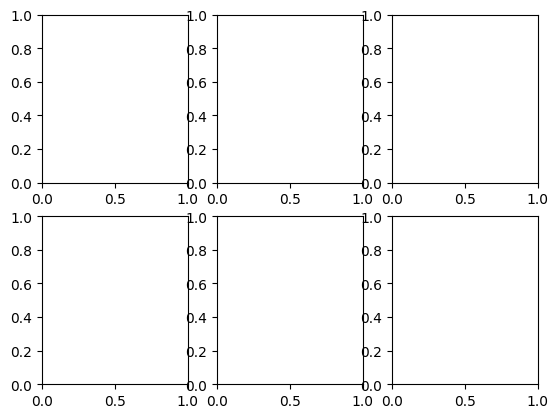

In [5]:

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    df['XrayLum'] = 10**(df['XrayLum'])
    stellar_mass = df['XrayLum'].to_numpy()
    massBH = df['massBH'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    zero_rows = (stellar_mass <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])


    print(massBH,stellar_mass)
    axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    
    axes[i][j].set_xlabel(r'Xray Luminosity in erg/s')
    #axes[i][j].set_xlim([10**0, 10**3])
    axes[i][j].set_ylabel(r'BH Mass in $M_{\odot}$')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/XrayLum_vs_BHMass')
plt.show()

[1545533.1   548080.44 5504006.5  ... 1141612.8   539826.9   372852.66] [0.22116774 0.0501036  0.4712701  ... 0.03858288 0.24754842 0.14334783]
[9.27176132e+09 1.17228050e+09 1.15667419e+09 ... 3.33663523e+06
 5.41607141e+06 6.60720468e+06] [46.7394447   1.61110854  1.19220984 ...  0.39358398  1.20034826
  0.41212547]
[1.40835330e+09 1.13286067e+09 1.24509309e+09 ... 1.42883698e+05
 1.42772233e+05 1.44346899e+05] [9.4884340e-01 1.6691258e+00 2.7299320e-01 ... 7.0314604e-04 4.8414484e-04
 5.5142740e-04]
[1.85293770e+09 2.62012105e+09 8.33740774e+08 ... 1.21393268e+06
 1.18177738e+06 1.18117065e+06] [4.90754e-02 7.18051e-01 3.24843e-03 ... 9.76879e-03 1.21625e-03
 3.75567e-04]
[46379244.16888101 15525834.07144966 20987304.39917331 ...
  1182527.3103041   1181130.79421317  1181613.52229111] [3.58998e+00 1.91190e+00 2.20183e-01 ... 4.01886e-03 5.65408e-03
 3.31755e-03]
[1.70298655e+10 1.64169001e+10 3.74938598e+09 ... 1.92066738e+06
 2.51162672e+08 5.17389781e+05] [3.24956131e+01 2.1102400

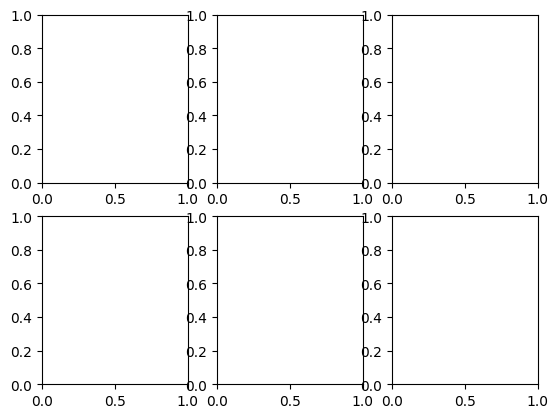

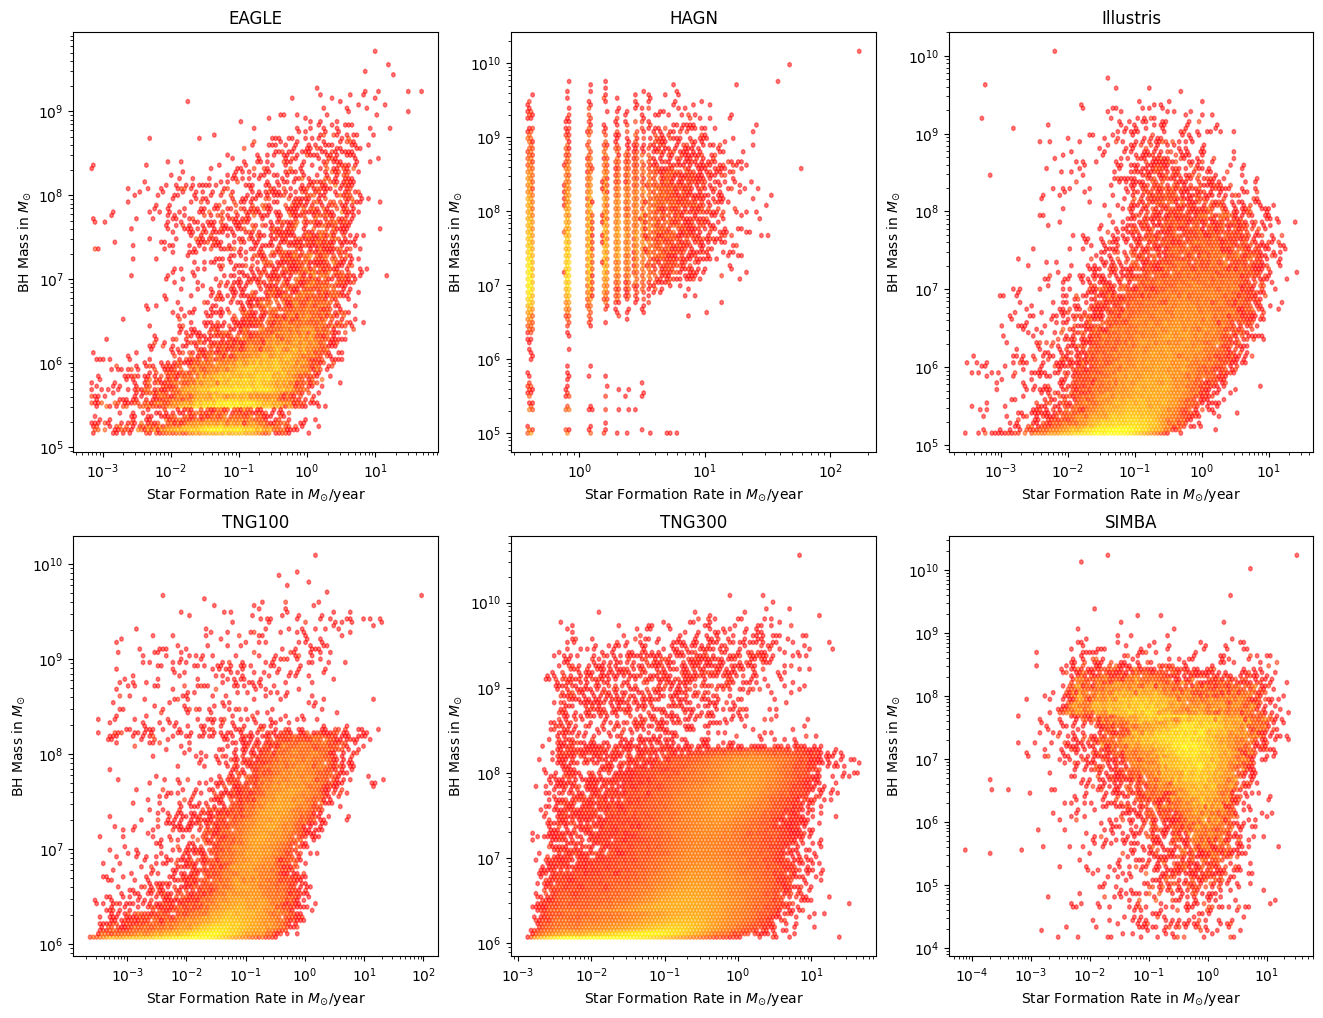

In [6]:

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    #df_data['XrayLum'] = 10**(df_data['XrayLum'])
    stellar_mass = df['SFR'].to_numpy()
    massBH = df['massBH'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    zero_rows = (stellar_mass <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])


    print(massBH,stellar_mass)
    axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    
    axes[i][j].set_xlabel(r'Star Formation Rate in $M_{\odot}$/year')
    #axes[i][j].set_xlim([10**0, 10**3])
    axes[i][j].set_ylabel(r'BH Mass in $M_{\odot}$')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/sfr_vs_BHMass')
plt.show()

c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


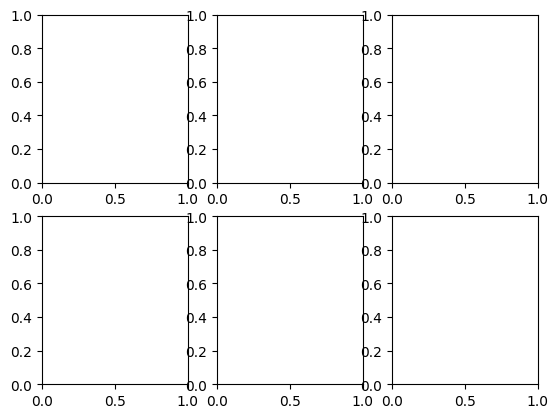

In [34]:
import matplotlib
#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    #df_data['XrayLum'] = 10**(df_data['XrayLum'])
    stellar_mass = df['SFR'].to_numpy()
    massBH = df['BHdot'].to_numpy()

    real_stellar_mass = df['stellar mass'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')

    zero_rows = (massBH <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
        real_stellar_mass = np.delete(real_stellar_mass, np.where(zero_rows)[0])

    zero_rows = (stellar_mass <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        first_invalid = np.where(zero_rows)[0][0]
        massBH = np.delete(massBH, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
        real_stellar_mass = np.delete(real_stellar_mass, np.where(zero_rows)[0])


    #cm = plt.cm.get_cmap('viridis',3)
    #cm = matplotlib.colors.ListedColormap([(254,74,73),(254, 215,102),(0,159,183)])
    cm = matplotlib.colors.ListedColormap(['blue','green','red'])
    #print(massBH,stellar_mass)
    #axes[i][j].hexbin(stellar_mass, massBH,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    pcm = axes[i][j].scatter(stellar_mass, massBH, c=real_stellar_mass,marker='+',alpha= 0.2,
                             cmap=cm, norm=matplotlib.colors.LogNorm(vmin= (10**9), vmax=(10**12)))
    axes[i][j].set_xlabel(r'SFR in Msun/year')
    #axes[i][j].set_xlim([10**0, 10**3])
    axes[i][j].set_ylabel(r'BH accretion rate in  erg/s')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    #axes[i][j].colorbar()
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3

fig.colorbar(pcm, ax=axes)
#fig.tight_layout()
plt.savefig('Figures/bhDot_vs_sfr_bins')
plt.show()